In [79]:
import re
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from bs4 import BeautifulSoup

In [2]:
main_characters = ['ДЖОУИ', 'МОНИКА', 'РЕЙЧЕЛ', 'РОСС', 'ФИБИ', 'ЧЕНДЛЕР']
texts = {i : "" for i in main_characters}

for name in main_characters:
    url = f'https://raw.githubusercontent.com/Alenush/style_transfer_sirius2021summer/main/data/scripts/russian/{name}.txt'
    req = requests.get(url)
    if req.status_code == requests.codes.ok:
        req = BeautifulSoup(req.text, 'html.parser')
        texts[name] = str(req)
    else:
        print('Content was not found.')

In [32]:
# разные метрики 
# https://github.com/ivbeg/readability.io/wiki/API

metrics = []
for name in main_characters:
    text = texts[name]
    response = requests.post("http://api.plainrussian.ru/api/1.0/ru/measure/", data={"text":text})
    metrics.append((name, response.json()))
metrics = sorted(metrics, key=lambda x: x[1]['indexes']['index_SMOG'])

100%|██████████| 6/6 [00:12<00:00,  2.13s/it]

Wall time: 12.8 s


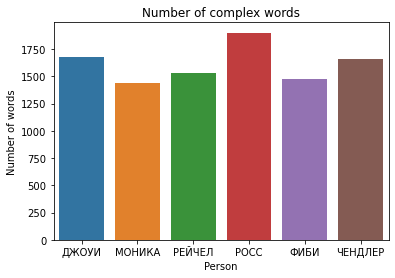

In [86]:
metrics_dct = dict(metrics)
complex_words = np.array([(name, int(metrics_dct[name]['metrics']['n_complex_words'])) for name in main_characters])
df_complex_words = pd.DataFrame(complex_words)
df_complex_words.columns = ['name', 'complex_words']
df_complex_words.complex_words = df_complex_words.complex_words.astype(int)

ax = sns.barplot(x="name", y="complex_words", data=df_complex_words)
ax.set(xlabel='Person', ylabel='Number of words', title='Number of complex words')
plt.show()

In [87]:
metrics

[('РЕЙЧЕЛ',
  {'metrics': {'wsyllabes': {'60': 1,
     '26': 1,
     '12': 1,
     '16': 1,
     '30': 1,
     '31': 1,
     '45': 1,
     '1': 28500,
     '171': 2,
     '3': 13765,
     '2': 25509,
     '5': 1193,
     '4': 4722,
     '7': 53,
     '6': 259,
     '9': 5,
     '8': 8,
     '79': 1,
     '72': 1},
    'c_share': 2.065518405943938,
    'chars': 462647,
    'avg_slen': 9.366696191319752,
    'spaces': 82672,
    'n_syllabes': 148413,
    'n_words': 74025,
    'letters': 337472,
    'n_sentences': 7903,
    'n_complex_words': 1529,
    'n_simple_words': 72496,
    'avg_syl': 2.004903748733536},
   'status': 0,
   'lang': 'ru',
   'debug': '0',
   'indexes': {'grade_SMOG': '4 - 6-й класс (возраст примерно: 9-11 лет)',
    'grade_ari': 'неизвестно (0)',
    'index_fk': 0.9482426208558934,
    'grade_cl': '1 - 3-й класс (возраст примерно: 6-8 лет)',
    'grade_fk': '1 - 3-й класс (возраст примерно: 6-8 лет)',
    'index_cl': 1.007264437689976,
    'grade_dc': '4 - 6-й класс 